# Passages of Time

In this notebook we'll use [```spaCy```, a Python module that does natural language processing,](https://spacy.io/usage/models) including part-of-speech tagging and named entity recognition (NER).

Our goal here is partly to explore the mechanics of using ```spaCy```--but also, and more importantly, to explore the humanistic uses of named entity recognition. In particular, we're going to explore some questions about the representation of time in fiction (thus the title of the notebook!)

So it's not going to be a disaster if you have difficulty getting ```spaCy``` itself to run. You probably don't already have ```spaCy``` installed on your machine, and I expect the process of installation will create glitches for a few people. That's okay; we've got work-arounds to help you explore the *results* of NER, even if the NER process itself won't run easily on your machine.

But let's give it a try. The cells below should help you install ```spaCy```, and then download the specific English-language model we want to use. (There are also models for other languages: see the link above.)

In [ ]:
!pip install spacy                          # this gets the python module itself

In [ ]:
!python -m spacy download en_core_web_sm    # this gets a particular English-lang model
# if this doesn't work try saying !python3 (everything else the same)
# or run the cell below and check what version you're running, and then say
# !python3.7, or !python3.8 (with everything else the same) as appropriate.

In [1]:
from platform import python_version
print(python_version())

3.7.4


In [29]:
import spacy
from spacy import displacy
from pprint import pprint
from collections import Counter
import en_core_web_sm
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### SECTION 0: Define a function that applies the English-language model

We're going to define a natural language processing pipeline that uses ```spaCy```'s small English-language model.

In [3]:
engl_nlp = en_core_web_sm.load()

The model will identify the *lemma* (root form) for each word and also label it with a part of speech.

In [4]:
doc = engl_nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices.')
for token in doc:
    print(token.text, token.lemma_, token.pos_)

European european ADJ
authorities authority NOUN
fined fin VERB
Google google PROPN
a a DET
record record NOUN
$ $ SYM
5.1 5.1 NUM
billion billion NUM
on on ADP
Wednesday wednesday PROPN
for for ADP
abusing abuse VERB
its -PRON- ADJ
power power NOUN
in in ADP
the the DET
mobile mobile ADJ
phone phone NOUN
market market NOUN
and and CCONJ
ordered order VERB
the the DET
company company NOUN
to to PART
alter alter VERB
its -PRON- ADJ
practices practice NOUN
. . PUNCT


It can also use context to identify certain words and phrases as "named entities"--a loose category that includes proper nouns, quantities, and references to particular quantities of money or lengths of time.

In [5]:
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


There's a nice built-in mode of visualizing entities, too.

In [6]:
displacy.render(doc, style = 'ent', jupyter = True)

### SECTION 1: Exploring different types of entities

How many different kinds of entities are available in ```spaCy```? One easy way to find out is to run entity recognition on our movie scripts, and collect a bunch of examples.

Note that it can take a couple of minutes for the  second cell below to run.

In [7]:
dialogpath = Path('../../data/movie_dialogue.tsv')
chars = pd.read_csv(dialogpath, sep = '\t')

In [8]:
# This may take a few minutes.

ent_types = dict()      # initialize a dictionary

for line in chars['lines'][0:80]:     # just go through the first eighty characters
    doc = engl_nlp(line)

    for entity in doc.ents:           # for each character, go through all the entities
        label = entity.label_         # get their labels
        if label not in ent_types:    # make sure there's a key for this label in the dictionary
            ent_types[label] = Counter()      # each label key points to a Counter for examples
        text = entity.text
        ent_types[label][text] += 1   # count the number of times we see each example

How many types of entities did we find?

In [9]:
for etype, examples in ent_types.items():
    print(etype, len(examples))

PERSON 716
DATE 209
ORG 321
CARDINAL 125
WORK_OF_ART 33
LANGUAGE 6
NORP 67
TIME 84
GPE 207
ORDINAL 10
PRODUCT 23
LOC 48
MONEY 59
FAC 39
QUANTITY 32
LAW 5
EVENT 11
PERCENT 7


To get an explanation of a particular label we can ask ```spaCy``` to ```explain()```:

In [10]:
spacy.explain('EVENT')

'Named hurricanes, battles, wars, sports events, etc.'

In [11]:
ent_types['EVENT']

Counter({'Olympics': 2,
         'the New Left': 1,
         'Gold Cup': 1,
         'Cottage Number Three': 1,
         'Easter Day': 1,
         'Easter Sunday': 1,
         'the War for': 1,
         'the Gulf War': 1,
         'the Christmas party': 1,
         'A Great White': 1,
         'Katrina': 4})

So Katrina occurred several times in these characters' lines, and ```spaCy``` inferred that it was the hurricane, not a person called Katrina. Whether it inferred correctly is hard to know from this evidence. But we can check by tracking the occurrences down in the data. In fact, these occurrences of Katrina are coming from the movie *Juno,* where Katrina was a person, not a hurricane! Mistakes do happen.

If you've got any questions about the meanings of tags, use ```spaCy```'s explain() function to inquire about them. It may also help to explore the examples in ```ent_types.``` Or you can look at an example from a movie script, like the lines from a gangster movie below.

In the example below, NER works pretty well, although the model may occasionally get confused whether a mob boss is a person, a place, or the name of an organization. Admittedly, in the mob it gets a little blurry.

**We'll stop here for discussion.**

In [12]:
doc = engl_nlp(chars.loc[200, 'lines'])
displacy.render(doc, style = 'ent', jupyter = True)

### SECTION 2: What can you do with NER?

Actually running named entity recognition across a large corpus can be a bit slow; to produce the data we'll use here took me a couple of hours. It didn't make sense to ask you to duplicate all that processing. If you can get the cells above to run, you can also get NER to run across a larger corpus.

Instead, let's ask what it's good for!

To explore this, I've created a table of extracted entities, ```book_entities.tsv.``` You'll need to get this from the Moodle and place it in your is417/data folder; it's a little too large to share via GitHub.

In [13]:
bookents = pd.read_csv('../../data/book_entities.tsv', sep = '\t')
bookents.head()

,book_id,entity_type,entity_text,count
0,38020,TIME,an hour,8
1,38020,TIME,hours,3
2,38020,TIME,that morning,2
3,38020,TIME,the night,1
4,38020,TIME,minutes,1


We also have a metadata file, ```entity_metadata.tsv.``` This I've placed on GitHub, so it should appear along with this notebook.

In [14]:
meta = pd.read_csv('../../data/entity_metadata.tsv', sep = '\t')
meta.head()

,book_id,author,authordate,title,compositionyear,hathidate,genre,audience,authgender,wordcount
0,6422,"Defoe, Daniel",1661-1731,"The life, adventures, and pyracies, of the fam...",1720,1720.0,fic,NaN,m,593408
1,370,"Defoe, Daniel",1661-1731,The Fortunes and Misfortunes of the Famous Mol...,1722,1765.0,fic,NaN,m,704890
2,52603,"Defoe, Daniel",1661-1731,Life of Colonel Jack.,1731,1810.0,fic,NaN,m,759489
3,12259,"Defoe, Daniel",1661-1731,"Memoirs of the Honourable Col. Andrew Newport,...",1731,1792.0,fic,NaN,m,588231
4,9611,"Fielding, Henry",1707-1754,The history of the adventures of Joseph Andrew...,1742,1743.0,fic,NaN,m,362496


Let's write some code that measures the frequency of a given type of entity in each book and then produces a scatterplot where the x axis is date of composition, the y axis is the frequency of that type of entity (measured as entities per thousand words), and each dot in the plot is a single book.

Your code should:

1. allow the user to enter an entity label, like ```TIME``` or ```MONEY.```

2. create a dataframe that has only entities of the desired type. 

3. Group entities by ```book_id``` and ```.sum()``` the counts of entities for each book.

4. Then join the ```composition_date,``` ```wordcount,``` and ```genre``` columns to your dataframe of summed counts,

5. Produce a ```frequency``` column by dividing entity counts by (wordcounts/1000), and finally

6. Graph entity frequency (composition_date will be the horizontal axis, and frequency will be the vertical axis).

Once you've got this working, you may want to limit the final graph by excluding biographies (```genre == 'bio'```).

**Collaborate in breakout groups to get the code working, and then discuss the observed patterns.**

Do some entities increase or decrease in frequency across time?

What hypotheses might explain the patterns you observe?

What kinds of *error* might be explaining these patterns? (Note that these are not optically transcribed texts; they're from the Gutenberg Project. So we don't have to worry about optical transcription error. But that's not the only kind of error in the world ...)

### SECTION 3: A specific question

In the process of exploring changes in different entities, you probably noticed that the frequencies of ```DATE``` and ```TIME``` entities are both going up across the timeline.

What could explain this?

Are people just getting more interested in time generally?

The British historian E. P. Thompson wrote a famous essay on ["Time, Work-Discipline, and Industrial Capitalism,"](https://www.sv.uio.no/sai/english/research/projects/anthropos-and-the-material/Intranet/economic-practices/reading-group/texts/thompson-time-work-discipline-and-industrial-capitalism.pdf) which argues that new forms of work associated with the industrial revolution tended to reorganize our conception of time around clocks and watches. Work was no longer organized by the task ("we'll work until the harvest's in") but by the clock ("eight to six, with a thirty-minute break for lunch").

If this explanation is right, we might expect the ```TIME``` entities to increase even more than the ```DATE``` entities do.

One way to think about this would be to calculate the ratio of TIME references to DATE references for all the works in our dataset, and graph the ratio on the vertical (y) axis, with date of composition on the horizontal (x) axis. We might need to use Laplacian smoothing to avoid division by zero.

Is there a relationship? Is it statistically significant?

**If we don't get to this in class, it might become homework.**

**If we do get to this in class, we'll frame a homework question about the difference between fiction and biography.**

### SECTION 4: What else could we do with entity extraction?

Matt Wilkens' essay on the time lag shaping literary history illustrates another influential way of using named entity recognition: *geoparsing,* which translates the place names in a text into latitude and longitude coordinates to plot on a map. We won't have time to explore that method in this lab, but there are lots of tools available to help you; e.g. [the ```geopy``` and ```geopandas``` modules make things pretty easy.](https://towardsdatascience.com/geoparsing-with-python-c8f4c9f78940)

Something we can do without installing a lot of additional Python modules is, dig more deeply into descriptions of time. The dividing line between ```DATE``` and ```TIME``` within ```spaCy``` is arbitrary. The people who wrote the software decided to separate entities that are smaller than a day from those that describe a whole day or a longer unit of time.

We don't really have a principled reason to rely on that binary division.

Also, some date and time references describe lengths of time, but some are just references to a particular hour of the day "eight o'clock" or day of the week "Wednesday." The approach we took in Section 3 mixed all those things together.

But with a bit more work, we could come up with a more principled estimate of the average span of time mentioned in a work of fiction (or a biography for that matter).

All we would need to do is identify the unit of time in each phrase (a "minute," "hour," "month," or what have you) and then the multiplier (if any) applied to the unit. E.g., "several minutes." Then we could translate most of our entities into a number roughly quantifying (say) the number of minutes that would elapse in the described span of time.

The code below does that, just to illustrate how we could develop our casual exploration of dates and times into a systematic measurement of the granularity of time in fiction.

Note that you could do something very similar with references to money.

In [71]:
def text2int (textnum, numwords={}):
    '''
    By Adnan Umer on Stack Overflow:
    https://stackoverflow.com/questions/493174/is-there-a-way-to-convert-number-words-to-integers
    '''
    
    if not numwords:
        units = [
        "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
        "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
        "sixteen", "seventeen", "eighteen", "nineteen",
        ]

        tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

        scales = ["hundred", "thousand", "million", "billion", "trillion"]

        numwords["and"] = (1, 0)
        for idx, word in enumerate(units):  numwords[word] = (1, idx)
        for idx, word in enumerate(tens):       numwords[word] = (1, idx * 10)
        for idx, word in enumerate(scales): numwords[word] = (10 ** (idx * 3 or 2), 0)

    ordinal_words = {}    # I've disabled the ordinal part
    ordinal_endings = []  # it's not appropriate for time

    textnum = textnum.replace('-', ' ')
    textnum = textnum.replace('a hundred', '100')
    textnum = textnum.replace('a thousand', '1000')
    textnum = textnum.replace('a million', '1000000')

    current = result = 0
    curstring = ""
    onnumber = False
    for word in textnum.split():
        if word in ordinal_words:
            scale, increment = (1, ordinal_words[word])
            current = current * scale + increment
            if scale > 100:
                result += current
                current = 0
            onnumber = True
        else:
            for ending, replacement in ordinal_endings:
                if word.endswith(ending):
                    word = "%s%s" % (word[:-len(ending)], replacement)

            if word not in numwords:
                if onnumber:
                    curstring += repr(result + current) + " "
                curstring += word + " "
                result = current = 0
                onnumber = False
            else:
                scale, increment = numwords[word]

                current = current * scale + increment
                if scale > 100:
                    result += current
                    current = 0
                onnumber = True

    if onnumber:
        curstring += repr(result + current)

    return curstring

def get_numeric_time(text):
    
    text = text.replace('\n', ' ').lower()
    
    if 'of age' in text:
        return float('nan')
    
    units = {'minute': 1, 'minutes': 1, 'hour': 60, 'hours': 60,
            'seconds': .017, 'moment': .017, 
            'day': 1440, 'days': 1440, 
            'night': 480, 'nights': 1440, 'week': 10080, 'weeks': 10080,
             'month': 40320, 'months': 40320, 'year': 525600, 'years': 525600}
    
    text = text2int(text)
    words = text.split()
    
    if 'old' in words:
        # this is saying how old someone is!
        return float('nan')
    
    multiplier = 1
    unit = 0
    for w in words:
        if w.isdigit():
            multiplier = int(w)
            if multiplier > 500:
                multiplier = 0
                # that's probably a date, not a count!
        elif w in units:
            unit = units[w]
        elif w == 'couple':
            multiplier = 2
        elif w == 'few':
            multiplier = 3
        elif w == 'several':
            multiplier = 4
        elif w == 'half':
            multiplier = multiplier * 0.5
        elif w == 'quarter':
            multiplier = multiplier * 0.25
    
    time = multiplier * unit
    
    if time == 0:
        time = float('nan')
    elif time > 20000000:
        time = 20000000
    
    return time
            
    

In [72]:
time_phrases = bookents.loc[(bookents['entity_type'] == 'TIME') | (bookents['entity_type'] == 'DATE'), : ]

In [73]:
times = time_phrases['entity_text'].map(get_numeric_time)
times[0:12]

0      60.0
1      60.0
2       NaN
3     480.0
4       1.0
5       NaN
6      60.0
7     480.0
8       5.0
9       NaN
10     30.0
11     15.0
Name: entity_text, dtype: float64

In [78]:
time_phrases = time_phrases.assign(minutes = times)
time_phrases = time_phrases.assign(logminutes = np.log(times))
time_phrases.sample(25)

,book_id,entity_type,entity_text,count,minutes,logminutes
71081,27223,DATE,the third day,1,1440.0,7.272398
201128,39203,DATE,one year's,1,NaN,NaN
166203,27710,DATE,nine days,1,12960.0,9.469623
134009,46346,DATE,four days past,1,5760.0,8.658693
54423,28271,DATE,three hundred years ago,1,20000000.0,16.811243
211427,35576,DATE,half a century,2,NaN,NaN
209618,36928,DATE,five or six weeks,1,60480.0,11.010068
99925,51665,DATE,particular day,1,1440.0,7.272398
72865,57539,DATE,more than three days,1,4320.0,8.371011
152345,38418,TIME,about seven o'clock in the evening,1,NaN,NaN


#### The central tendency of a log-normal distribution

Wow, time spans are distributed pretty strangely. If you inspect the distribution, it is in no way normal.

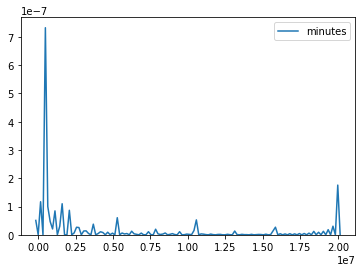

In [76]:
sns.kdeplot(time_phrases['minutes'])

On the other hand, the logarithm of time span is distributed closer to normally.

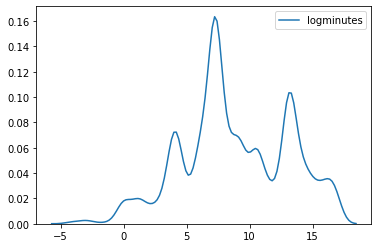

In [77]:
sns.kdeplot(time_phrases['logminutes'])

So it's going to make sense to take the mean of ```logminutes``` instead of the mean of ```minutes.``` The mean of ```minutes``` will be strongly dominated by a small number of extreme values at the high end. Differences at the low end will get erased.

In [98]:
timesbybook = time_phrases.groupby('book_id', as_index = False).mean()
timesbybook.head()

,book_id,count,minutes,logminutes
0,370,1.533865,1.343646e+06,9.856990
1,652,1.513043,1.190564e+06,9.445946
2,696,1.320000,7.398842e+05,7.109794
3,1079,1.558673,1.334169e+06,9.194056
4,1880,2.543396,1.337387e+06,6.478144


Let's join composition year and genre.

In [99]:
if 'book_id' in meta.columns:
    meta = meta.set_index('book_id')

timesbybook = timesbybook.join(meta.loc[: , ['compositionyear', 'genre']], on = 'book_id')
timesbybook.head()

,book_id,count,minutes,logminutes,compositionyear,genre
0,370,1.533865,1.343646e+06,9.856990,1722,fic
1,652,1.513043,1.190564e+06,9.445946,1784,fic
2,696,1.320000,7.398842e+05,7.109794,1791,fic
3,1079,1.558673,1.334169e+06,9.194056,1768,fic
4,1880,2.543396,1.337387e+06,6.478144,1840,fic


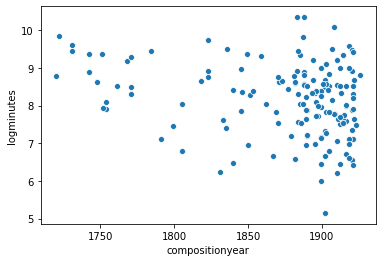

In [100]:
timesbybook = timesbybook.loc[timesbybook['genre'] == 'fic', : ]
timesbybook = timesbybook.loc[~np.isnan(timesbybook['logminutes']), : ]
sns.scatterplot(x = timesbybook['compositionyear'], y = timesbybook['logminutes'])

In [101]:
from scipy.stats import pearsonr
pearsonr(timesbybook['compositionyear'], timesbybook['logminutes'])

(-0.2522540169395552, 0.0014888455008497563)

**Conclusion:** In short, it looks like description of time gets considerably more granular as we move from the eighteenth century to the early twentierh. The spans of time mentioned get shorter on average.

Since there are significant sources of error in entity extraction, we might want to confirm this manually. In practice, the inference we're drawing does seem to check out.